# Step 7: 2D Diffusion

And here is the 2D-diffusion equation ($x$-direction):

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$

You will recall that we came up with a method for discretizing second order derivatives in Step 3, when investigating 1-D diffusion.
We are going to use the same scheme here, with our forward difference in time and two second-order derivatives. 

$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}$$

Once again, we reorganize the discretized equation and solve for $u_{i,j}^{n+1}$

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^n &+ \frac{\nu \mathop\Delta\!t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) \\
&+ \frac{\nu \mathop\Delta\!t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = "svg"
import matplotlib.pyplot as plt
import matplotlib.animation as anim

plt.rcParams["animation.html"] = "html5"
from matplotlib import cm


def plot3d_field(field, zlabel=None, zlim=None):
    global x
    global y
    X, Y = np.meshgrid(x, y)
    fig, ax = plt.subplots(figsize=(11, 7), dpi=300, subplot_kw={"projection": "3d"})
    ax.plot_surface(
        X,
        Y,
        field,
        cmap=cm.coolwarm,
        rstride=1,
        cstride=1,
        antialiased=False,
        linewidth=0,
    )
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    if zlabel is not None:
        ax.set_zlabel(zlabel)
    if zlim is not None:
        ax.set_zlim(*zlim)
    ax.set_box_aspect(aspect=None, zoom=0.8)
    plt.show()

In [2]:
# Solution parameters
x_domain_interval: tuple[float] = (0.0, 2.0)
y_domain_interval: tuple[float] = (0.0, 2.0)
nx: int = 31
ny: int = 31
nt: int = 80
nu: float = 0.05
dx: float = (x_domain_interval[1] - x_domain_interval[0]) / (nx - 1)
dy: float = (y_domain_interval[1] - y_domain_interval[0]) / (ny - 1)
sigma: float = 0.25
dt: float = sigma * dx * dy / nu

# Domain
x: np.ndarray = np.linspace(*x_domain_interval, nx)
y: np.ndarray = np.linspace(*y_domain_interval, ny)

# Grid of coordinate points
X, Y = np.meshgrid(x, y)

## Initial and Boundary Conditions

In [3]:
# Same as step 6
u = np.ones((ny, nx))

# Assign initial conditions
# Set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(0.5 / dy) : int(1 / dy + 1), int(0.5 / dx) : int(1 / dx + 1)] = 2.0
u0 = u.copy()

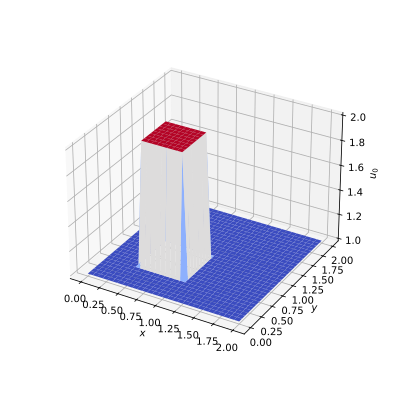

In [4]:
plot3d_field(u0, zlabel=r"$u_0$")

In [5]:
solutions = [u0.copy()]

u = u0.copy()

for n in range(nt + 1):
    u[1:-1, 1:-1] = (
        u[1:-1, 1:-1]
        + nu * dt / dx**2 * (u[1:-1, 2:] - 2 * u[1:-1, 1:-1] + u[1:-1, 0:-2])
        + nu * dt / dy**2 * (u[2:, 1:-1] - 2 * u[1:-1, 1:-1] + u[0:-2, 1:-1])
    )
    u[0, :] = 1.0
    u[-1, :] = 1.0
    u[:, 0] = 1.0
    u[:, -1] = 1.0
    solutions.append(u.copy())

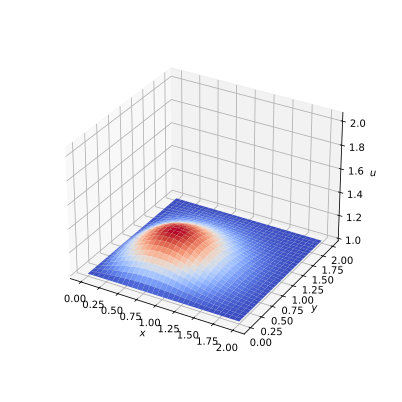

In [6]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.coolwarm,
#     linewidth=0, antialiased=True)
# ax.set_zlim(1, 2.05)
# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$');
plot3d_field(solutions[-1], zlabel=r"$u$", zlim=(1, 2.05))

## Animation

In [7]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.close()


def update_anim(frame):
    ax.cla()
    ax.plot_surface(X, Y, solutions[frame], cmap=cm.coolwarm)
    ax.set_zlim([1.0, 2.05])
    return (fig,)


ani = anim.FuncAnimation(
    fig, func=update_anim, frames=len(solutions), interval=35, blit=True
)
ani